In [6]:
# 絶対値を返す関数
def absolute(a):
    if a >= 0:
        return a
    else:
        return a*-1

In [7]:
absolute(-734)

734

# 単回帰

## numpy操作

In [8]:
import numpy as np
x = np.array([1,2,3])
x

array([1, 2, 3])

In [10]:
y = np.array([2,3.9,6.1])
y

array([2. , 3.9, 6.1])

In [13]:
# centering
xc = x - x.mean()
yc = y - y.mean()
print(xc)
print(yc)

[-1.  0.  1.]
[-2.  -0.1  2.1]


Cost functionはこの場合sum(Yn - aXn)^2　で定義されている  
これの偏微分が０になるようなaの値が求まればOK（実際はコスト関数は完全に０にはならない)  
d/da(sum(Yn-aXn)^2)=0  
a = sum(XnYn)/sum(Xn^2)  

In [17]:
#　compute parameter a
xx = xc**2
xy = xc * yc

In [18]:
a = xy.sum()/xx.sum()

In [19]:
a

2.05

## pandas

In [22]:
import pandas as pd
df = pd.read_csv('sample.csv')
df.head(5)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0


In [23]:
x = df['x']
y = df['y']

## Matplotlib

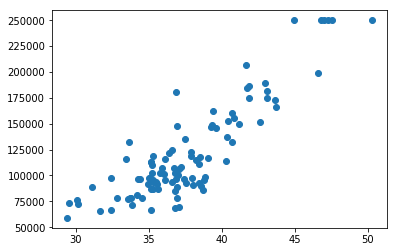

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

## 単回帰実装

In [27]:
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [28]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [30]:
dfc = df - df.mean()
dfc.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [31]:
dfc.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.918465e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


<function matplotlib.pyplot.show(*args, **kw)>

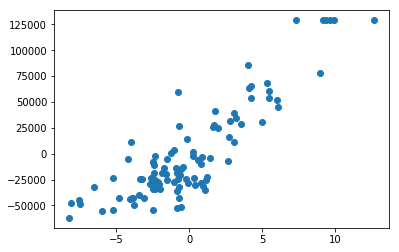

In [32]:
x = dfc['x']
y = dfc['y']
plt.scatter(x,y)
plt.show

In [35]:
a = sum(x*y)/sum(x**2)
a

10069.022519284064

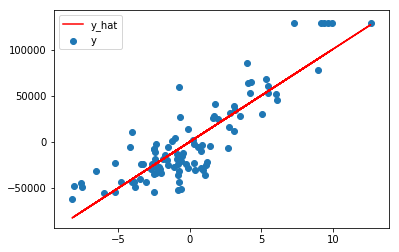

In [38]:
plt.plot(x,a*x,label='y_hat',color='red')
plt.scatter(x,y, label='y')
plt.legend()
plt.show()

In [39]:
x_new = 40

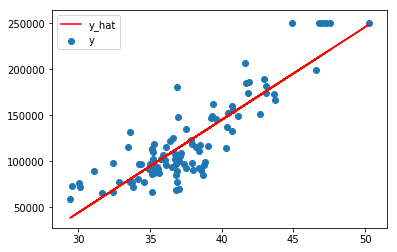

In [40]:
#　中心化を戻す
mean = df.mean()
plt.plot(x+mean['x'],a*x+mean['y'], label='y_hat', color='red')
plt.scatter(x+mean['x'], y+mean['y'], label='y')
plt.legend()
plt.show()